In [34]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

from sklearn.pipeline import Pipeline
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [5]:
df = pd.read_csv('../data/placement_processed.csv')

In [6]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,placed,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.0


## Feature Engineering

In [7]:
df_modelling = df.copy()

In [8]:
df_modelling = df_modelling.drop(columns='salary')

In [9]:
df_modelling

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,placed
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,0,91.0,Mkt&Fin,74.49,1
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,0,74.0,Mkt&Fin,53.62,1
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,1,59.0,Mkt&Fin,69.72,1
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,0,70.0,Mkt&HR,60.23,1


In [10]:
df_modelling = pd.get_dummies(data=df_modelling, columns=['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'specialisation'])

In [11]:
df_modelling

,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,placed,gender_F,gender_M,ssc_b_Central,...,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,67.00,91.00,58.00,0,55.0,58.80,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
1,79.33,78.33,77.48,1,86.5,66.28,1,0,1,1,...,0,1,0,0,1,0,0,1,1,0
2,65.00,68.00,64.00,0,75.0,57.80,1,0,1,1,...,1,0,1,0,0,1,0,0,1,0
3,56.00,52.00,52.00,0,66.0,59.43,0,0,1,1,...,1,0,0,0,1,0,0,1,0,1
4,85.80,73.60,73.30,0,96.8,55.50,1,0,1,1,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,0,91.0,74.49,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
211,58.00,60.00,72.00,0,74.0,53.62,1,0,1,0,...,0,1,0,0,1,0,0,1,1,0
212,67.00,67.00,73.00,1,59.0,69.72,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
213,74.00,66.00,58.00,0,70.0,60.23,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1


In [12]:
df_modelling.dtypes

ssc_p                     float64
hsc_p                     float64
degree_p                  float64
workex                      int64
etest_p                   float64
mba_p                     float64
placed                      int64
gender_F                    uint8
gender_M                    uint8
ssc_b_Central               uint8
ssc_b_Others                uint8
hsc_b_Central               uint8
hsc_b_Others                uint8
hsc_s_Arts                  uint8
hsc_s_Commerce              uint8
hsc_s_Science               uint8
degree_t_Comm&Mgmt          uint8
degree_t_Others             uint8
degree_t_Sci&Tech           uint8
specialisation_Mkt&Fin      uint8
specialisation_Mkt&HR       uint8
dtype: object

In [13]:
df_modelling.isnull().sum()

ssc_p                     0
hsc_p                     0
degree_p                  0
workex                    0
etest_p                   0
mba_p                     0
placed                    0
gender_F                  0
gender_M                  0
ssc_b_Central             0
ssc_b_Others              0
hsc_b_Central             0
hsc_b_Others              0
hsc_s_Arts                0
hsc_s_Commerce            0
hsc_s_Science             0
degree_t_Comm&Mgmt        0
degree_t_Others           0
degree_t_Sci&Tech         0
specialisation_Mkt&Fin    0
specialisation_Mkt&HR     0
dtype: int64

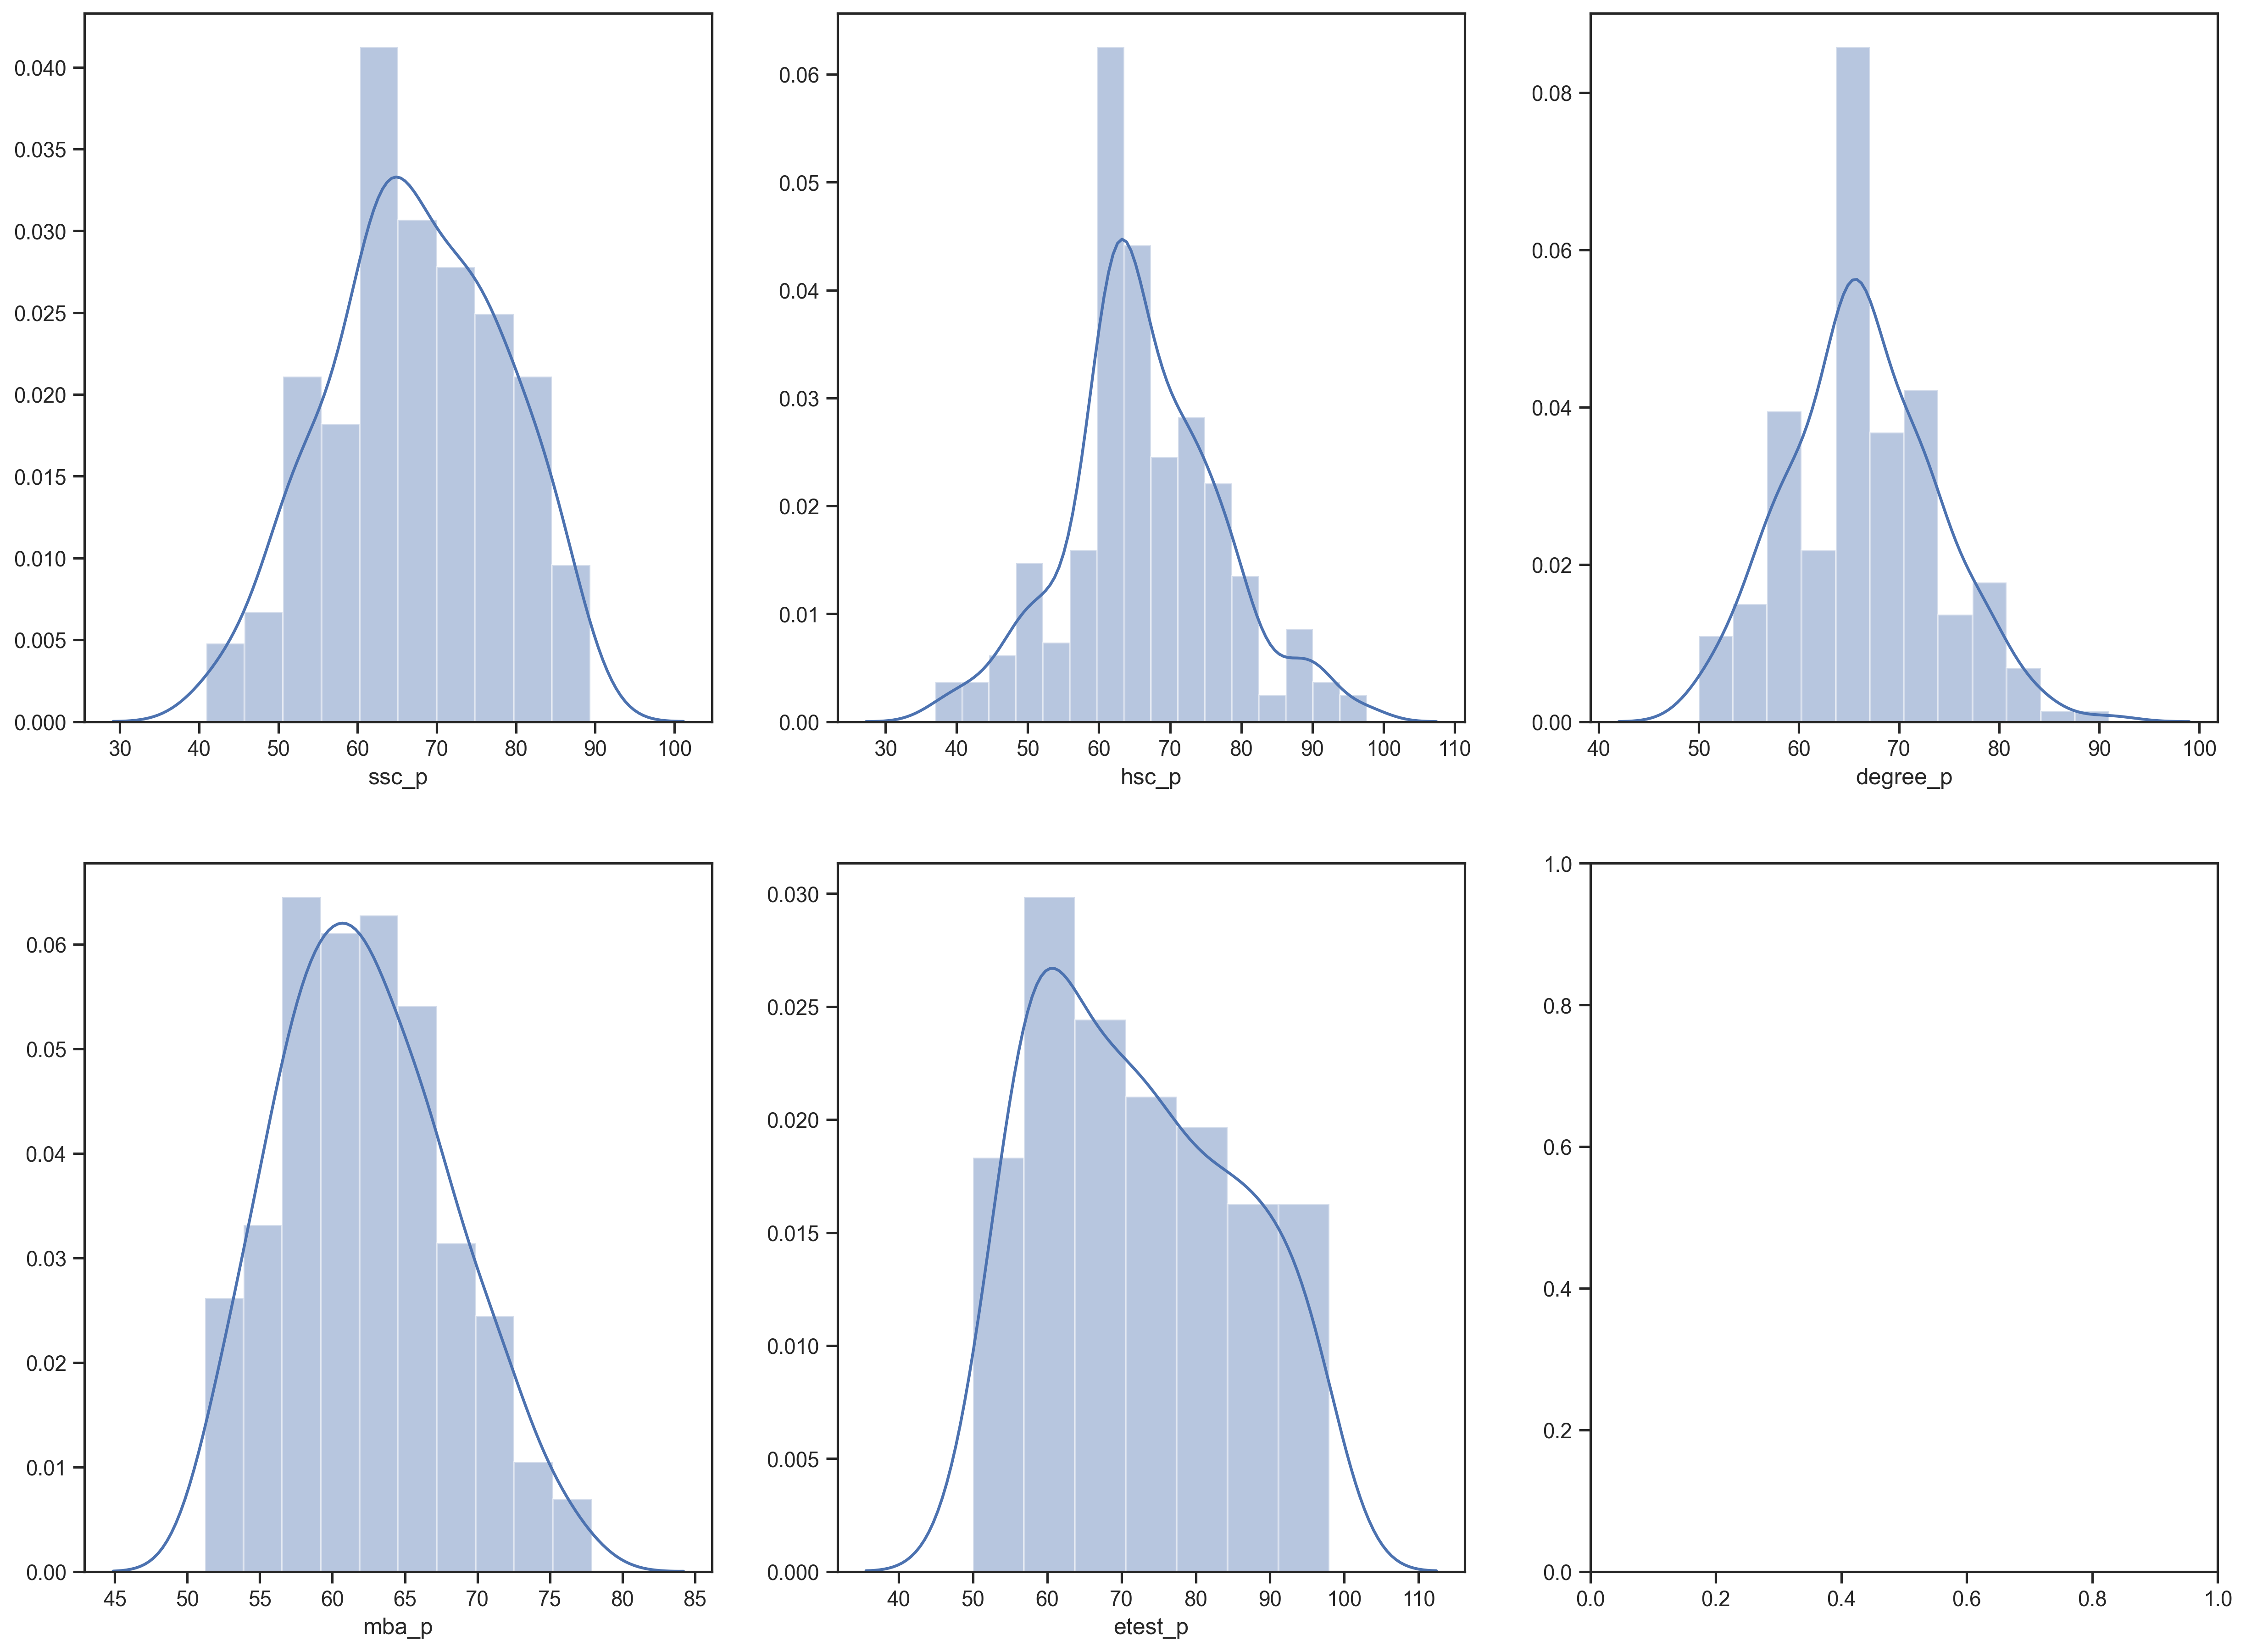

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(20, 15), dpi=300)
sns.distplot(df_modelling['ssc_p'], ax=ax[0,0])
sns.distplot(df_modelling['hsc_p'], ax=ax[0,1])
sns.distplot(df_modelling['degree_p'], ax=ax[0,2])
sns.distplot(df_modelling['mba_p'], ax=ax[1,0])
sns.distplot(df_modelling['etest_p'], ax=ax[1,1])

## Train-Test Split

In [24]:
print("Total students      = {:}".format(len(df_modelling)))
print("Students Placed     = {:} ({:.2%})".format(df_modelling['placed'].sum(), df_modelling['placed'].sum()/len(df_modelling)))
print("Students not Placed = {:} ({:.2%})".format(sum(df_modelling['placed']==0), sum(df_modelling['placed']==0)/len(df_modelling)))

Total students      = 215
Students Placed     = 148 (68.84%)
Students not Placed = 67 (31.16%)


In [25]:
test_set = [10, 15, 20, 25, 30, 35]

for i in test_set:
    
    print('---------------------------')
    print('{:}% of the data would approximately mean:\n'.format(i))
    print('{:f} train observations'.format(round(len(df_modelling)*(100-i)/100)))
    print('{:f} test observations'.format(round(len(df_modelling)*i/100)))

---------------------------
10% of the data would approximately mean:

194.000000 train observations
22.000000 test observations
---------------------------
15% of the data would approximately mean:

183.000000 train observations
32.000000 test observations
---------------------------
20% of the data would approximately mean:

172.000000 train observations
43.000000 test observations
---------------------------
25% of the data would approximately mean:

161.000000 train observations
54.000000 test observations
---------------------------
30% of the data would approximately mean:

150.000000 train observations
64.000000 test observations
---------------------------
35% of the data would approximately mean:

140.000000 train observations
75.000000 test observations


In [26]:
y = df_modelling['placed']
X = df_modelling.drop(columns=['placed'])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.15,
                                                   random_state = 42)

In [28]:
len(X_train), len(X_test)

(182, 33)

## Logistic Regression

In [33]:
classifier = LogisticRegression(max_iter=1000)
skf = StratifiedKFold(n_splits=3)

model_scores = cross_validate(classifier,
                              X_train,
                              y_train,
                              scoring='accuracy',
                              cv=skf,
                              return_train_score=True)

classifier.fit(X_train, y_train)

print("Model = Logistic Regression\n".format(classifier))
print("Train Score = {:f}".format(model_scores['train_score'].mean()))
print("Test Score = {:f}".format(model_scores['test_score'].mean()))
print("Score Diff. = {:f}".format(model_scores['train_score'].mean()-model_scores['test_score'].mean()))

Model = Logistic Regression

Train Score = 0.920313
Test Score = 0.857286
Score Diff. = 0.063027


In [ ]:
pipeline_lr = Pipeline([
    'scaler', StandardScaler(),
    'classifier', LogisticRegression(max_iter=1000)])

In [ ]:
pipeline_sgdc = Pipeline([
    'scaler', StandardScaler(),
    'classifier', SGDClassifier(loss='log')])

In [ ]:
pipeline_knn = Pipeline([
    'scaler', StandardScaler(),
    'classifier', KNeighborsClassifier()])

In [ ]:
pipeline_dt = Pipeline([
    'scaler', StandardScaler(),
    'classifier', DecisionTreeClassifier(random_state=42)])

In [ ]:
pipeline_rf = Pipeline([
    'scaler', StandardScaler(),
    'classifier', RandomForestClassifier(random_state=42)])

In [ ]:
pipeline_rf = Pipeline([
    'scaler', StandardScaler(),
    'classifier', SVC])